# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [2]:
import pandas as pd
import numpy as np

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11128\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:
import pickle
data = pd.read_pickle('dtm.pkl')

In [11]:
data=data.transpose()

#### Find  and print the top 30 words said by each comedian


In [13]:
top30 = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top30[c]= list(zip(top.index, top.values))

top30

{'ali': [('like', 126),
  ('im', 71),
  ('just', 64),
  ('know', 63),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('gotta', 21),
  ('wanna', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('time', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 15),
  ('need', 14),
  ('pregnant', 14),
  ('hes', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('really', 12),
  ('look', 12)],
 'anthony': [('im', 58),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 37),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('just', 30),
  ('anthony', 30),
  ('say', 26),
  ('day', 26),
  ('people', 23),
  ('guys', 23),
  ('tell', 19),
  ('youre', 18),
  ('grandma', 18),
  ('right', 18),
  ('jokes', 17),
  ('thing', 17),
  ('time', 17),
  ('think', 17),
  ('school', 16),
  ('good', 16),
  ('okay', 16),
  ('did', 16),
  ('ive', 15),
  ('yeah', 15),
  ('gonna', 15),
  ('baby', 15)],
 

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [14]:
from collections import Counter

# Let's first create a list that just has each comedians top 30 words (even if repeated)
words = []
for comedian in data.columns:
    top = [word for (word, count) in top30[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'just',
 'know',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'oh',
 'gotta',
 'wanna',
 'husband',
 'got',
 'right',
 'time',
 'cause',
 'day',
 'women',
 'people',
 'need',
 'pregnant',
 'hes',
 'god',
 'yeah',
 'tell',
 'really',
 'look',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'just',
 'anthony',
 'say',
 'day',
 'people',
 'guys',
 'tell',
 'youre',
 'grandma',
 'right',
 'jokes',
 'thing',
 'time',
 'think',
 'school',
 'good',
 'okay',
 'did',
 'ive',
 'yeah',
 'gonna',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'think',
 'fuck',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'theres',
 'let',
 'little',
 'transcriptsgeorge',
 'transcriptsstanley',
 'transcriptscomedystandup',
 'seriestv',
 'comedy',
 'carlindave',
 'kubricktv',
 'chappelleinterviewsplayboy',
 '

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [15]:
Counter(words).most_common()

[('like', 10),
 ('im', 10),
 ('just', 10),
 ('know', 10),
 ('dont', 10),
 ('thats', 10),
 ('right', 10),
 ('people', 10),
 ('youre', 9),
 ('got', 9),
 ('gonna', 8),
 ('time', 7),
 ('think', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('said', 6),
 ('shit', 5),
 ('day', 5),
 ('yeah', 5),
 ('really', 5),
 ('say', 5),
 ('thing', 5),
 ('didnt', 5),
 ('going', 5),
 ('theyre', 5),
 ('theres', 5),
 ('good', 4),
 ('fucking', 4),
 ('fuck', 4),
 ('did', 3),
 ('ive', 3),
 ('want', 3),
 ('little', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('dude', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('transcriptsgeorge', 2),
 ('transcriptsstanley', 2),
 ('transcriptscomedystandup', 2),
 ('seriestv', 2),
 ('comedy', 2),
 ('carlindave', 2),
 ('kubricktv', 2),
 ('chappelleinterviewsplayboy', 2),
 ('search', 2),
 ('reviewsmovie', 2),
 ('interviewsmusichistorybooks', 2),
 ('scraps', 2),
 ('movie', 2),
 ('page', 2),
 ('loft', 2),
 ('moviesmovie', 2),

#### If more than half of the comedians have it as a top word, exclude it from the list


In [16]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'just',
 'know',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'time',
 'think']

In [24]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text # Contains the stop word list
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data from corpus
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix which excludes our additional stop words
cv = CountVectorizer(stop_words=list(stop_words))
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [29]:
pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/75/7a/cad3b21a91cc55abe06f70146b564f20d9db2aee9631fdee580283bd5e1e/wordcloud-1.9.3-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/ef/d8/f97270d25a003435e408e6d1e38d8eddc9b3e2c7b646719f4b3a5293685d/pillow-10.2.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/46/37/b5e27ab30ecc0a3694c8a78287b5ef35dad0c3095c144fcc43081170bfd6/matplotlib-3.8.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/fd/7c/168f8343f33d861305e18c56901ef1bb675d3c7f977f435ec72751a71a54/contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de51

In [30]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [43]:
data = pd.read_pickle("dtm.pkl")
data = data.transpose()

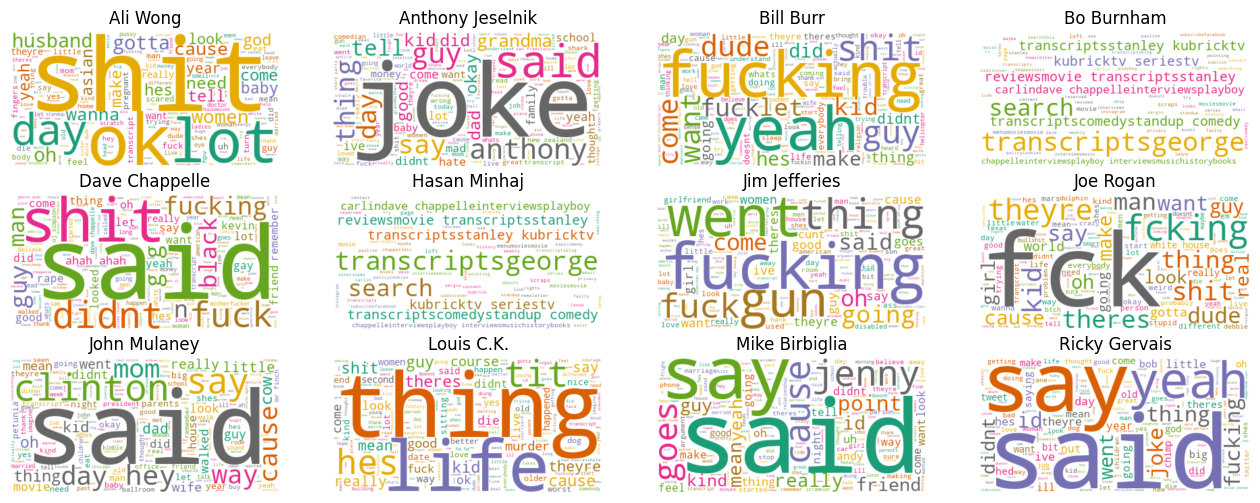

In [45]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [44]:
# Create a new dataframe that contains this unique word count
unique_list = []
for comedian in data.columns:
    uniques = data[comedian][data[comedian]>0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
3,Bo Burnham,64
5,Hasan Minhaj,64
1,Anthony Jeselnik,1147
9,Louis C.K.,1237
6,Jim Jefferies,1435
0,Ali Wong,1480
4,Dave Chappelle,1534
8,John Mulaney,1534
7,Joe Rogan,1586
10,Mike Birbiglia,1629


In [46]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB (in minutes)
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
5,Hasan Minhaj,64,104,73,1.424658
3,Bo Burnham,64,104,60,1.733333
1,Anthony Jeselnik,1147,3190,59,54.067797
0,Ali Wong,1480,3506,60,58.433333
9,Louis C.K.,1237,3555,58,61.293103
4,Dave Chappelle,1534,4300,67,64.179104
6,Jim Jefferies,1435,4985,77,64.740260
10,Mike Birbiglia,1629,4973,76,65.434211
11,Ricky Gervais,1772,5200,79,65.822785
8,John Mulaney,1534,4249,62,68.532258


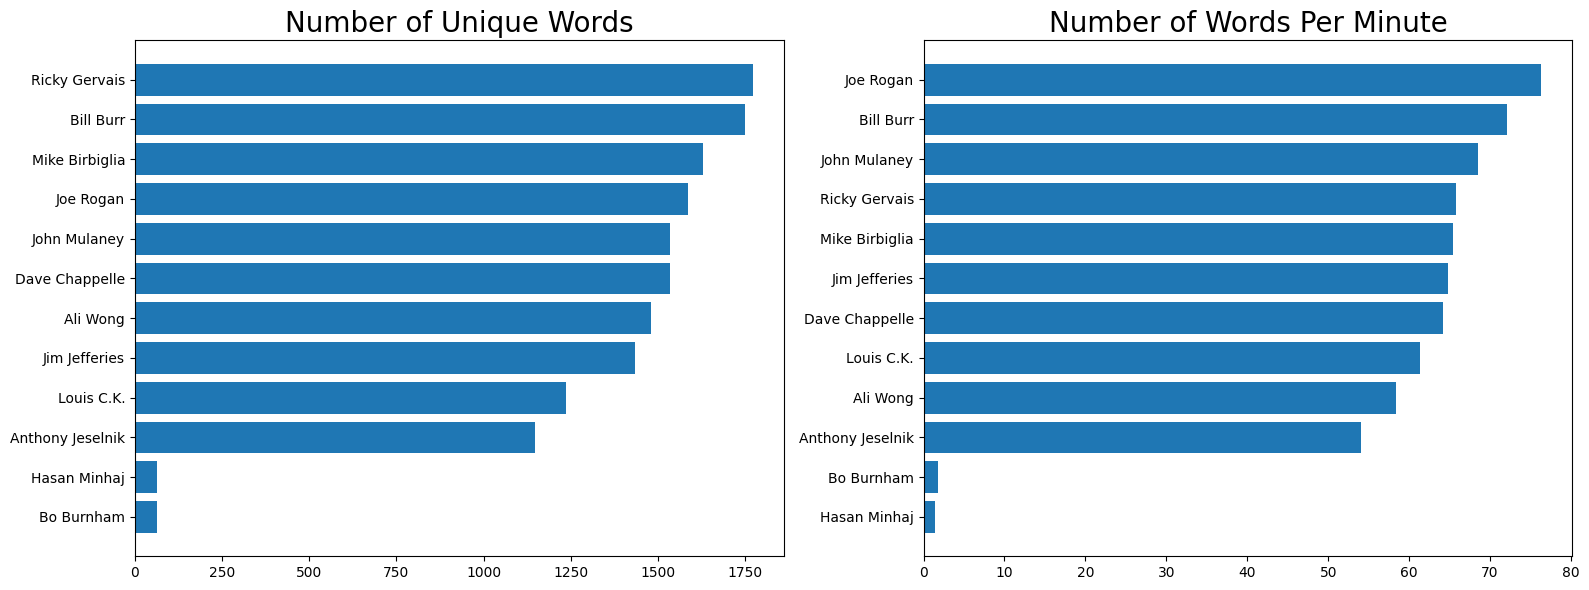

In [47]:
# plot our findings
# import numpy as np

y_pos = np.arange(len(data_words)) # Return evenly spaced values within a given interval. Stop at len(data_words)
plt.subplot(1, 2, 1) # plt.subplot (nrows, ncols, index)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

#### Write your findings. For example:
* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

### Assignment 3: 
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [48]:
# take a look at the most common words.
Counter(words).most_common()

[('like', 10),
 ('im', 10),
 ('just', 10),
 ('know', 10),
 ('dont', 10),
 ('thats', 10),
 ('right', 10),
 ('people', 10),
 ('youre', 9),
 ('got', 9),
 ('gonna', 8),
 ('time', 7),
 ('think', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('said', 6),
 ('shit', 5),
 ('day', 5),
 ('yeah', 5),
 ('really', 5),
 ('say', 5),
 ('thing', 5),
 ('didnt', 5),
 ('going', 5),
 ('theyre', 5),
 ('theres', 5),
 ('good', 4),
 ('fucking', 4),
 ('fuck', 4),
 ('did', 3),
 ('ive', 3),
 ('want', 3),
 ('little', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('dude', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('transcriptsgeorge', 2),
 ('transcriptsstanley', 2),
 ('transcriptscomedystandup', 2),
 ('seriestv', 2),
 ('comedy', 2),
 ('carlindave', 2),
 ('kubricktv', 2),
 ('chappelleinterviewsplayboy', 2),
 ('search', 2),
 ('reviewsmovie', 2),
 ('interviewsmusichistorybooks', 2),
 ('scraps', 2),
 ('movie', 2),
 ('page', 2),
 ('loft', 2),
 ('moviesmovie', 2),

In [49]:
# isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1) # Manually combine fucking and fuck as the same word
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,107,64
bo,0,0
dave,65,45
hasan,0,0
jim,115,20
joe,0,38
john,4,6
louis,21,23


In [50]:
data_profanity.index

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

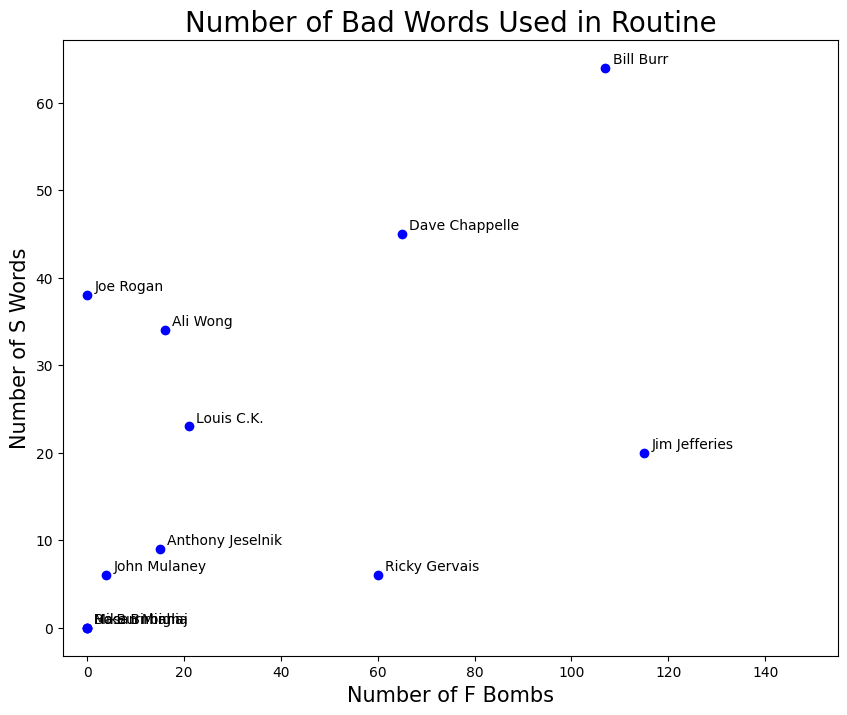

In [51]:
# create a scatter plot of your findings
plt.rcParams['figure.figsize'] = [10, 8] # Set width to 10 inches and height to 8 inches

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10) # Offset the label to avoid overlap of names and dot
    plt.xlim(-5, 155)
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Write your findings. 
#### For example:
* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.